# Chapter: Government Bonds

In [1]:
pip install financepy

Note: you may need to restart the kernel to use updated packages.


Add Treasury Bill as BondZero

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from financepy.utils import *
from financepy.products.bonds import *

####################################################################
#  FINANCEPY BETA Version 0.360 - This build: 01 May 2024 at 15:47 #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



In [4]:
100+4/32+1/64  # price was quoted as 100-04+

100.140625

In [5]:
set_date_format(DateFormatTypes.UK_LONGEST)

Extract Bond Market Conventions	

In [6]:
bmkt = bond_market.BondMarkets

#print("Country& Accrual & Frequency & Settlement & Ex-Dividend\\\\\n")

for country in BondMarkets:
    (accrual, freq, sett_days, exdiv, cal) = get_bond_market_conventions(country)
    
    country_str = str(country)
    country_str = country_str.replace("_", " ")
    accrual_str = str(accrual)
    accrual_str = accrual_str.replace("_","-")
    freq_str = str(freq)
    freq_str = freq_str.replace("_", "-")
    print(country_str[12:], "&", accrual_str[14:], "&", freq_str[15:], "&", sett_days, "&", exdiv, "\\\\")

AUSTRIA & ACT-ACT-ICMA & ANNUAL & 2 & 0 \\
BELGIUM & ACT-ACT-ICMA & ANNUAL & 2 & 0 \\
CYPRUS & ACT-ACT-ICMA & SEMI-ANNUAL & 2 & 0 \\
ESTONIA & ACT-ACT-ICMA & ANNUAL & 2 & 0 \\
FINLAND & ACT-ACT-ICMA & ANNUAL & 2 & 0 \\
FRANCE & ACT-ACT-ICMA & ANNUAL & 2 & 0 \\
GERMANY & ACT-ACT-ICMA & ANNUAL & 2 & 0 \\
GREECE & ACT-ACT-ICMA & ANNUAL & 3 & 0 \\
IRELAND & ACT-ACT-ICMA & ANNUAL & 2 & 0 \\
ITALY & ACT-ACT-ICMA & SEMI-ANNUAL & 2 & 0 \\
LATVIA & ACT-ACT-ICMA & ANNUAL & 2 & 0 \\
LITHUANIA & ACT-ACT-ICMA & ANNUAL & 1 & 0 \\
LUXEMBOURG & ACT-ACT-ICMA & ANNUAL & 2 & 0 \\
MALTA & ACT-ACT-ICMA & SEMI-ANNUAL & 2 & 0 \\
NETHERLANDS & ACT-ACT-ICMA & ANNUAL & 2 & 0 \\
PORTUGAL & ACT-ACT-ICMA & ANNUAL & 2 & 0 \\
SLOVAKIA & ACT-ACT-ICMA & ANNUAL & 2 & 0 \\
SLOVENIA & ACT-ACT-ICMA & ANNUAL & 2 & 0 \\
SPAIN & ACT-ACT-ICMA & ANNUAL & 2 & 0 \\
ESM & ACT-ACT-ICMA & ANNUAL & 2 & 0 \\
EFSF & ACT-ACT-ICMA & ANNUAL & 2 & 0 \\
BULGARIA & ACT-ACT-ICMA & SEMI-ANNUAL & 0 & 0 \\
CROATIA & ACT-ACT-ICMA & SEMI-ANNUAL &

# Define the Bond

In [7]:
issue_date = Date(30, 11, 2022)
maturity_date = Date(30, 11, 2024)
coupon = 0.045
freq_type = FrequencyTypes.SEMI_ANNUAL
accrual_type = DayCountTypes.ACT_ACT_ICMA
face = 100

treasury_note = Bond(issue_date, maturity_date, coupon, 
                     freq_type, accrual_type, face)

FinError: Ex dividend days cannot be more than 90100

You can get information about the bond using the print method.

### Bond Cash Flows

We first need to set the settlement date of the bond. 

In [9]:
settlement_date = Date(6, 2, 2023)
face = 1000000.0
treasury_note.print_bond_payments(settlement_date, face)

WED 31 MAY 2023  22500.00000 
THU 30 NOV 2023  22500.00000 
FRI 31 MAY 2024  22500.00000 
SAT 30 NOV 2024 1022500.00000 



### Accrued Interest Conventions

In [10]:
for accrual_type in list(DayCountTypes)[1:]:
	treasury_note = Bond(issue_date, maturity_date, coupon, 
                         freq_type, accrual_type)
	# Accrued Interest
	ai = treasury_note.accrued_interest(settlement_date, face)
	print(accrual_type, ai)

DayCountTypes.THIRTY_360_BOND 8250.0
DayCountTypes.THIRTY_E_360 8250.0
DayCountTypes.THIRTY_E_360_ISDA 8250.0
DayCountTypes.THIRTY_E_PLUS_360 8250.0
DayCountTypes.ACT_ACT_ISDA 8383.561643835617
DayCountTypes.ACT_ACT_ICMA 8406.593406593407
DayCountTypes.ACT_365F 8383.561643835617
DayCountTypes.ACT_360 8500.0
DayCountTypes.ACT_365L 8383.561643835617
DayCountTypes.SIMPLE 8383.561643835617


In [11]:
list(DayCountTypes)

[<DayCountTypes.ZERO: 0>,
 <DayCountTypes.THIRTY_360_BOND: 1>,
 <DayCountTypes.THIRTY_E_360: 2>,
 <DayCountTypes.THIRTY_E_360_ISDA: 3>,
 <DayCountTypes.THIRTY_E_PLUS_360: 4>,
 <DayCountTypes.ACT_ACT_ISDA: 5>,
 <DayCountTypes.ACT_ACT_ICMA: 6>,
 <DayCountTypes.ACT_365F: 7>,
 <DayCountTypes.ACT_360: 8>,
 <DayCountTypes.ACT_365L: 9>,
 <DayCountTypes.SIMPLE: 10>]

The convention is to use these dates for yield calculations even if some fall on weekends.

## Bond Price Action

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

In [13]:
settlement_date.datetime()

datetime.date(2023, 2, 6)

In [14]:
import pandas
dates = pandas.date_range(settlement_date.datetime(),
                          maturity_date.datetime()-timedelta(days=1),
                          freq='d')

In [15]:
yld = 0.03
clean_prices = []
dirty_prices = []

for date in dates:
    fp_date = Date.from_date(date)
    clean_price = treasury_note.clean_price_from_ytm(fp_date, yld)
    dirty_price = treasury_note.dirty_price_from_ytm(fp_date, yld)
    clean_prices.append(clean_price)
    dirty_prices.append(dirty_price)

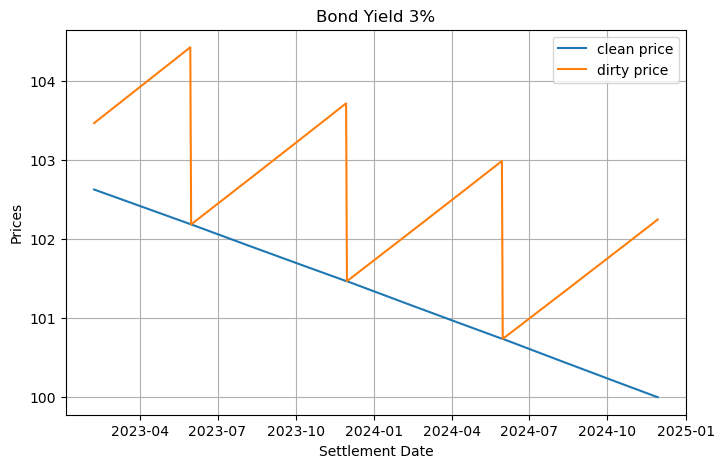

In [16]:
plt.figure(figsize=(8,5))
plt.plot(dates, clean_prices, label="clean price")
plt.plot(dates, dirty_prices, label="dirty price")
plt.xlabel("Settlement Date")
plt.ylabel("Prices")
plt.title("Bond Yield 3%")
plt.legend()
plt.grid(True)
plt.savefig("../figures/price_action_flat_low_yield.pdf")

In [17]:
yld = 0.06
clean_prices = []
dirty_prices = []
for date in dates:
    fp_date = Date.from_date(date)
    clean_price = treasury_note.clean_price_from_ytm(fp_date, yld)
    dirty_price = treasury_note.dirty_price_from_ytm(fp_date, yld)
    clean_prices.append(clean_price)
    dirty_prices.append(dirty_price)

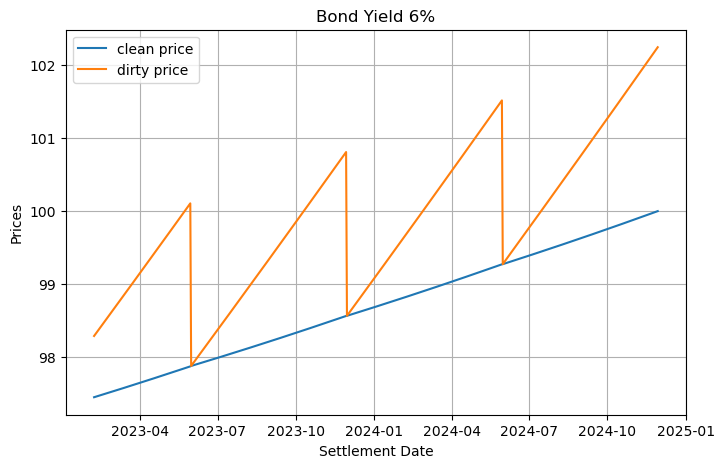

In [18]:
plt.figure(figsize=(8,5))
plt.plot(dates, clean_prices, label="clean price")
plt.plot(dates, dirty_prices, label="dirty price")
plt.xlabel("Settlement Date")
plt.ylabel("Prices")
plt.title("Bond Yield 6%")
plt.legend()
plt.grid(True)
plt.savefig("../figures/price_action_flat_high_yield.pdf")

## Bond Yield Measures

Treasury Bill with price of 98.21 that matures in 6 months

In [19]:
y = (100/98.21)**2-1

In [20]:
print(y)

0.03678469592986633


## Treasury Note

In [21]:
issue_date = Date(30, 11, 2022)
maturity_date = Date(30, 11, 2024)
coupon = 0.045
freq_type = FrequencyTypes.SEMI_ANNUAL
accrual_type = DayCountTypes.ACT_ACT_ICMA
face = 100

treasury_note = Bond(issue_date, maturity_date, coupon, 
                     freq_type, accrual_type, face)

## Yield Measures for Bond

In [22]:
# https://www.bondsupermart.com/bsm/bond-factsheet/US91282CFX48

In [23]:
# Redefine this as I need the correct accrual type
issue_date = Date(30, 11, 2022)
maturity_date = Date(30, 11, 2024)
coupon = 0.045
freq_type = FrequencyTypes.SEMI_ANNUAL
accrual_type = DayCountTypes.ACT_ACT_ICMA

treasury_note = Bond(issue_date, maturity_date, coupon, freq_type, accrual_type)

In [24]:
treasury_note

OBJECT TYPE: Bond
ISSUE DATE: WED 30 NOV 2022
MATURITY DATE: SAT 30 NOV 2024
COUPON (%): 4.5
FREQUENCY: FrequencyTypes.SEMI_ANNUAL
ACCRUAL TYPE: DayCountTypes.ACT_ACT_ICMA
EX_DIV DAYS: 0

In [25]:
clean_price = 100+4/32+1/64  # price was quoted as 100-04+

In [26]:
settlement_date = Date(6, 2, 2023)

In [27]:
# Accrued Interest
face = 1000000.0
ai = treasury_note.accrued_interest(settlement_date, face)
print("Accrued Interest:", ai)

Accrued Interest: 8406.593406593407


In [28]:
treasury_note._accrued_days

68.0

Current yield is the coupon over the price

In [29]:
print("Current Yield %12.6f %%" % (treasury_note.current_yield(clean_price)*100))

Current Yield     4.493681 %


In [30]:
calcTypes = [YTMCalcType.UK_DMO, YTMCalcType.US_STREET, YTMCalcType.US_TREASURY]

Yield to maturity using different conventions

In [31]:
for ytmCalcType in calcTypes:
    y = treasury_note.yield_to_maturity(settlement_date, clean_price, ytmCalcType)
    print("%30s %14.10f" % (ytmCalcType, y*100))

            YTMCalcType.UK_DMO   4.4151139326
         YTMCalcType.US_STREET   4.4151139326
       YTMCalcType.US_TREASURY   4.4118629469


Let's check the calculation by reproducing it here. We check that the yield gives us the correct bond clean price.

In [32]:
def p_d(y):
	alpha = 68/182
	c = 0.045
	f = 2.0
	v1 = 100.0*(c/y)*(1-1/((1+y/f)**4))
	v2 = 100.0/((1+y/f)**4.0)
	v = (v1 + v2)*((1+y/f)**alpha)
	return v 

In [33]:
ytm = treasury_note.yield_to_maturity(settlement_date, clean_price, 
                                      YTMCalcType.UK_DMO)
print(ytm)

0.04415113932558936


In [34]:
cp = treasury_note.clean_price_from_ytm(settlement_date, ytm, 
                                      YTMCalcType.UK_DMO)

In [35]:
print(cp)

100.14062500000001


In [36]:
# You should see that the estimated and FinancePy prices are very close (MAKE THEM EXACT)
pd = p_d(ytm)
pc = pd - ai/10000
print("Dirty Price:", pd)
print("Estimated Clean Price:", pc)
print("FinancePy Clean Price:", clean_price)

Dirty Price: 100.98128434279161
Estimated Clean Price: 100.14062500213227
FinancePy Clean Price: 100.140625


In [37]:
# Check AI Calculation
AI = 100*(0.045/2) *(68)/182 * face/100
print(AI)

8406.593406593407


In [38]:
print("Principal = %12.2f" % treasury_note.principal(settlement_date, ytm, face, YTMCalcType.UK_DMO))

Principal =   1009812.84


## UK Gilt Bond

We examine what happens to the bond price as we change the yield. We choose a longer-dated bond. Note that this bond has an ex-dividend period of 7 days.

In [39]:
# GB0032452392
issue_date = Date(27, 2, 2003)
ex_dividend = Date(29, 8, 2023)
maturity_date = Date(7, 3, 2036)
coupon = 0.0425
freq_type = FrequencyTypes.SEMI_ANNUAL
accrual_type = DayCountTypes.ACT_ACT_ICMA
ex_div_days = 7

gilt_bond = Bond(issue_date, maturity_date, coupon, 
                 freq_type, accrual_type, ex_div_days)

In [40]:
gilt_bond

OBJECT TYPE: Bond
ISSUE DATE: THU 27 FEB 2003
MATURITY DATE: FRI 07 MAR 2036
COUPON (%): 4.25
FREQUENCY: FrequencyTypes.SEMI_ANNUAL
ACCRUAL TYPE: DayCountTypes.ACT_ACT_ICMA
EX_DIV DAYS: 7

In [41]:
gilt_bond.print_bond_payments(settlement_date, face)

TUE 07 MAR 2023  21250.00000 
THU 07 SEP 2023  21250.00000 
THU 07 MAR 2024  21250.00000 
SAT 07 SEP 2024  21250.00000 
FRI 07 MAR 2025  21250.00000 
SUN 07 SEP 2025  21250.00000 
SAT 07 MAR 2026  21250.00000 
MON 07 SEP 2026  21250.00000 
SUN 07 MAR 2027  21250.00000 
TUE 07 SEP 2027  21250.00000 
TUE 07 MAR 2028  21250.00000 
THU 07 SEP 2028  21250.00000 
WED 07 MAR 2029  21250.00000 
FRI 07 SEP 2029  21250.00000 
THU 07 MAR 2030  21250.00000 
SAT 07 SEP 2030  21250.00000 
FRI 07 MAR 2031  21250.00000 
SUN 07 SEP 2031  21250.00000 
SUN 07 MAR 2032  21250.00000 
TUE 07 SEP 2032  21250.00000 
MON 07 MAR 2033  21250.00000 
WED 07 SEP 2033  21250.00000 
TUE 07 MAR 2034  21250.00000 
THU 07 SEP 2034  21250.00000 
WED 07 MAR 2035  21250.00000 
FRI 07 SEP 2035  21250.00000 
FRI 07 MAR 2036 1021250.00000 



## Ex-Dividend Dates

In [112]:
start_date = Date(20, 8, 2023)
end_date = Date(13, 9, 2023)

In [113]:
start_date, end_date

(SUN 20 AUG 2023, WED 13 SEP 2023)

In [114]:
dates = pandas.date_range(start_date.datetime(), end_date.datetime(), freq='d')

In [115]:
dates

DatetimeIndex(['2023-08-20', '2023-08-21', '2023-08-22', '2023-08-23',
               '2023-08-24', '2023-08-25', '2023-08-26', '2023-08-27',
               '2023-08-28', '2023-08-29', '2023-08-30', '2023-08-31',
               '2023-09-01', '2023-09-02', '2023-09-03', '2023-09-04',
               '2023-09-05', '2023-09-06', '2023-09-07', '2023-09-08',
               '2023-09-09', '2023-09-10', '2023-09-11', '2023-09-12',
               '2023-09-13'],
              dtype='datetime64[ns]', freq='D')

In [116]:
yld = 0.05
clean_prices = []
dirty_prices = []
accrued_ints = []

for date in dates:
    fp_date = Date.from_date(date)
    clean_price = gilt_bond.clean_price_from_ytm(fp_date, yld)
    dirty_price = gilt_bond.dirty_price_from_ytm(fp_date, yld)
    accrued_int = gilt_bond.accrued_interest(fp_date, 100.0)
    clean_prices.append(clean_price)
    dirty_prices.append(dirty_price)
    accrued_ints.append(accrued_int)

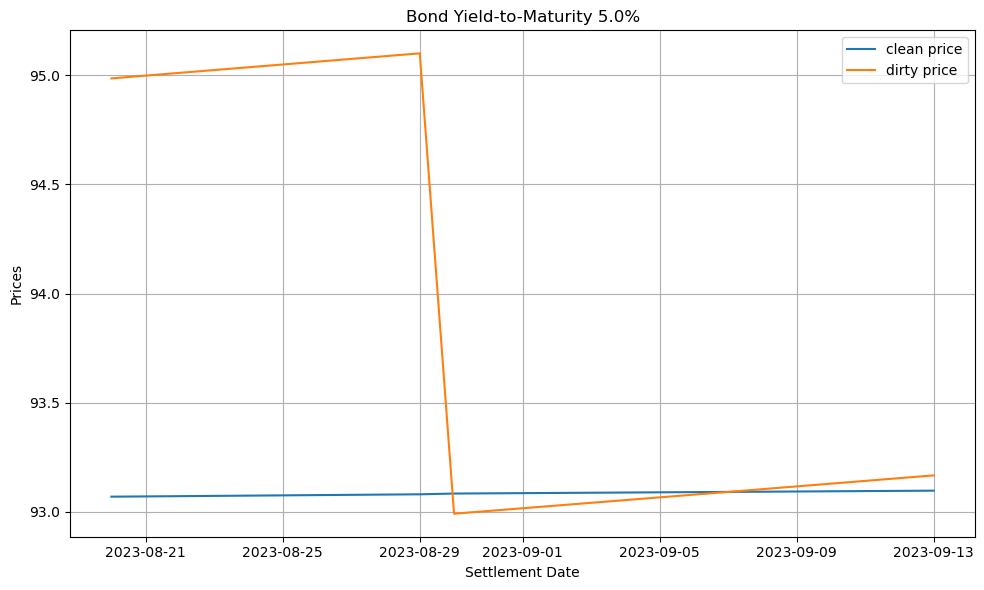

In [119]:
plt.figure(figsize=(10,6))
plt.plot(dates, clean_prices, label="clean price")
plt.plot(dates, dirty_prices, label="dirty price")
plt.xlabel("Settlement Date")
plt.ylabel("Prices")
plt.title("Bond Yield-to-Maturity 5.0%")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.savefig("../figures/price_action_ex_dividend.pdf")

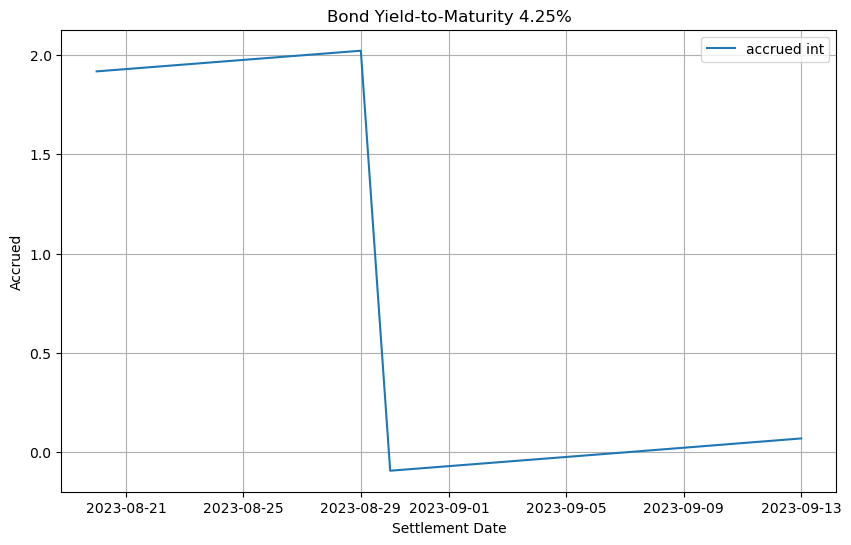

In [118]:
plt.figure(figsize=(10,6))
plt.plot(dates, accrued_ints, label="accrued int")
plt.xlabel("Settlement Date")
plt.ylabel("Accrued")
plt.title("Bond Yield-to-Maturity 4.25%")
plt.legend()
plt.grid(True)
plt.savefig("../figures/accrued_action_ex_dividend.pdf")

In [48]:
settlement_date = Date(11, 8, 2023)
ai = gilt_bond.accrued_interest(settlement_date, face)
print("Accrued Interest:", ai)

Accrued Interest: 18131.793478260868


Within 7 days of a coupon period we have a negative accrued interest

In [49]:
settlement_date = Date(29, 8, 2023)
ai = gilt_bond.accrued_interest(settlement_date, face)
print("Accrued Interest:", ai)

Accrued Interest: 20210.597826086956


## Price Sensitivities of Bond Securities

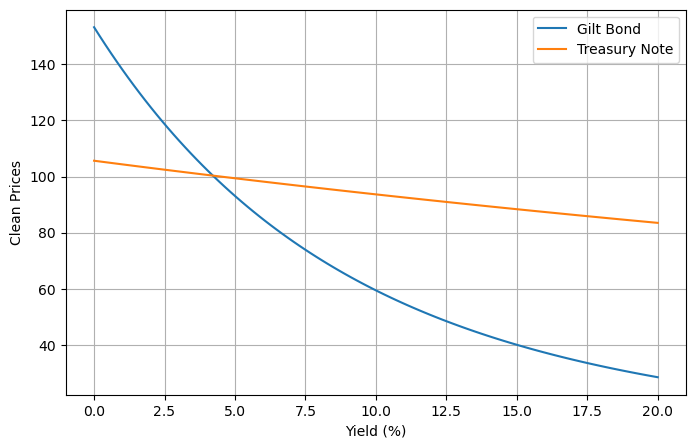

In [100]:
ytms = np.linspace(0.0, 0.20, 100)
clean_gilt_prices = gilt_bond.clean_price_from_ytm(settlement_date, ytms, YTMCalcType.UK_DMO)
clean_trsy_prices = treasury_note.clean_price_from_ytm(settlement_date, ytms, YTMCalcType.UK_DMO)

plt.figure(figsize=(8,5))
plt.plot(ytms*100, clean_gilt_prices,label="Gilt Bond")
plt.plot(ytms*100, clean_trsy_prices,label="Treasury Note")

plt.xlabel("Yield-to-Maturity (%)")
plt.ylabel("Clean Prices")
plt.legend()
plt.grid(True)
plt.savefig("../figures/bond_price_yield_large.pdf")


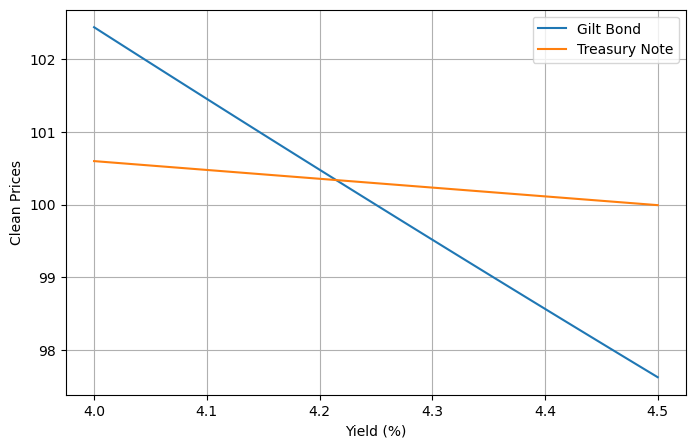

In [101]:
ytms = np.linspace(0.04, 0.045, 100)
clean_gilt_prices = gilt_bond.clean_price_from_ytm(settlement_date, ytms, YTMCalcType.UK_DMO)
clean_trsy_prices = treasury_note.clean_price_from_ytm(settlement_date, ytms, YTMCalcType.UK_DMO)

plt.figure(figsize=(8,5))
plt.plot(ytms*100, clean_gilt_prices,label="Gilt Bond")
plt.plot(ytms*100, clean_trsy_prices,label="Treasury Note")

plt.xlabel("Yield-to-Maturity (%)")
plt.ylabel("Clean Prices")
plt.legend()
plt.grid(True)
plt.savefig("../figures/bond_price_yield_small.pdf")

## Bond Price Sensitivities

The bond dollar duration is the actual derivative with respect to the yield. It is the bond price change for a 1bp drop in the yield-to-maturity divided by 1bp.

In [52]:
for ytmCalcType in calcTypes:
    y = gilt_bond.yield_to_maturity(settlement_date, clean_price, ytmCalcType)
    print("%30s %12.6f" % (ytmCalcType, y*100))

            YTMCalcType.UK_DMO     4.950991
         YTMCalcType.US_STREET     4.950991
       YTMCalcType.US_TREASURY     4.950840


### Treasury bond

In [53]:
duration = treasury_note.dollar_duration(settlement_date, ytm, YTMCalcType.UK_DMO)
print("Dollar Duration = ", duration)

Dollar Duration =  120.93493902902708


In [54]:
modified_duration = treasury_note.modified_duration(settlement_date, ytm, YTMCalcType.UK_DMO)
print("Modified Duration = ", modified_duration)

Modified Duration =  1.1949752223917613


In [55]:
macauley_duration = treasury_note.macauley_duration(settlement_date, ytm, YTMCalcType.UK_DMO)
print("Macauley Duration = ", macauley_duration)

Macauley Duration =  1.2213549811589843


In [56]:
conv = treasury_note.convexity_from_ytm(settlement_date, ytm, YTMCalcType.UK_DMO)
print("Convexity = ", conv)

Convexity =  0.020377179971818486


### Now for the UK Gilt Bond

In [57]:
duration = gilt_bond.dollar_duration(settlement_date, ytm, YTMCalcType.UK_DMO)
print("Dollar Duration = ", duration)

Dollar Duration =  945.0599375480095


Modified Duration divides the dollar duration by the full price of the bond

In [58]:
modified_duration = gilt_bond.modified_duration(settlement_date, ytm, YTMCalcType.UK_DMO)
print("Modified Duration = ", modified_duration)

Modified Duration =  9.408781074891385


Macauley Duration multiplies the dollar duration by (1+y/f) and divides by the full price

In [59]:
macauley_duration = gilt_bond.macauley_duration(settlement_date, ytm, YTMCalcType.UK_DMO)
print("Macauley Duration = ", macauley_duration)

Macauley Duration =  9.616485276952135


Convexity is the second derivative of the bond price with respect to the yield-to-maturity

In [60]:
conv = gilt_bond.convexity_from_ytm(settlement_date, ytm, YTMCalcType.UK_DMO)
print("Convexity = ", conv)

Convexity =  1.097463534879755


## Bond Price Action

We have some actual price history for the Treasury bond

In [61]:
import pandas as pd
df_bond_prices = pd.read_excel("../excel/Prices_US91282CFX48.xlsx")

dates = df_bond_prices.Date.values
clean_prices = df_bond_prices.Close.values

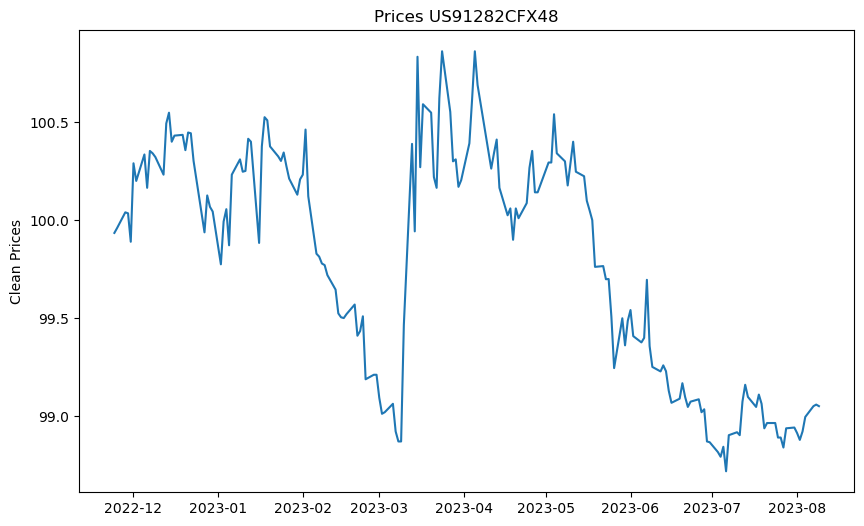

In [62]:
plt.figure(figsize=(10,6))
plt.plot(dates, clean_prices*100)
plt.ylabel("Clean Prices")
plt.title("Prices US91282CFX48")
plt.savefig("../figures/clean_prices_US91282CFX48.pdf")

In [63]:
# The bond is on 1m face so we divide by 10000
n_dates = len(dates)
dirty_prices = np.zeros(n_dates)
accrueds = np.zeros(n_dates)

for i in range(0, n_dates):
    fp_sett_dt = Date.from_date(dates[i])
    accrueds[i] = treasury_note.accrued_interest(fp_sett_dt, 1)
    dirty_prices[i] = clean_prices[i] + accrueds[i]

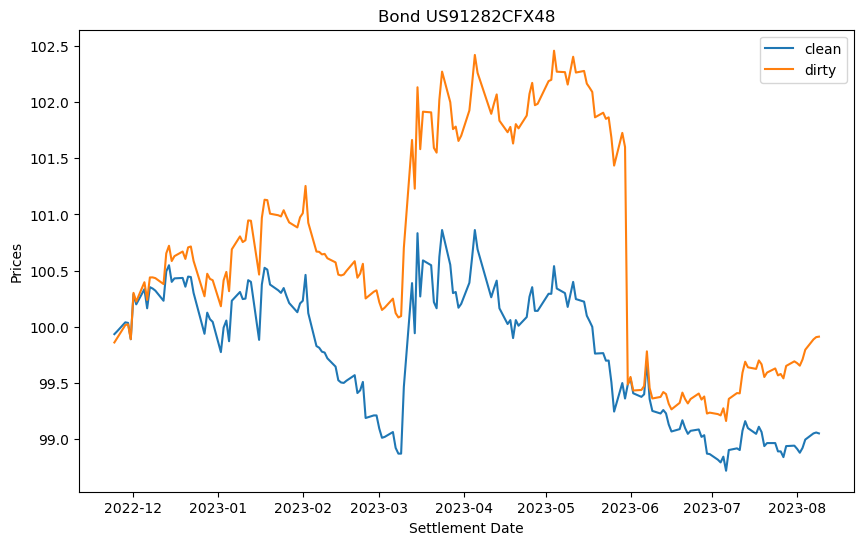

In [64]:
plt.figure(figsize=(10,6))
plt.plot(dates, clean_prices*100, label="clean")
plt.plot(dates, dirty_prices*100, label="dirty")
plt.xlabel("Settlement Date")
plt.ylabel("Prices")
plt.title("Bond US91282CFX48")
plt.legend()
plt.savefig("../figures/all_prices_US91282CFX48.pdf")

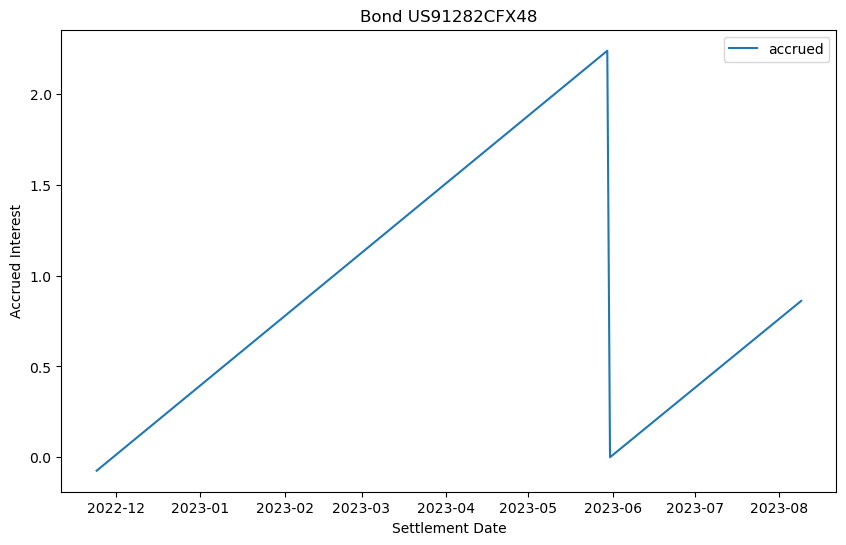

In [65]:
plt.figure(figsize=(10,6))
plt.plot(dates, accrueds*100, label="accrued")
plt.ylabel("Accrued Interest")
plt.xlabel("Settlement Date")
plt.title("Bond US91282CFX48")
plt.legend()
plt.savefig("../figures/accrued_US91282CFX48.pdf")

Copyright (c) 2022 Dominic O'Kane